### Analyzing GPT Categorization
Last modified: 5/2/24 \
Authors: Caroline Jung & Sandy Liu

### Visualizing GPT Categorization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dir_path = "/users/carolinejung/CS315-proj3-group2/2-analysis/" #CHANGE ME!

In [82]:
category_names = ["civil rights", "culture", "energy and environment", "health, education, and labor",
                  "immigration and international affairs", "housing and social welfare", "defense, law, and crime",
                  "economy, commerce, and transportation", "other"]

female_categories = pd.read_csv(dir_path+"female_categories.csv").drop_duplicates(ignore_index=True)
male_categories = pd.read_csv(dir_path+"male_categories_may2.csv").drop_duplicates(ignore_index=True)

In [84]:
def clean_df(df):
    new_rows = []
    for person in df.iterrows():
        id = person[1]["video_id"]
        description = person[1]["Description"]

        for category in category_names:
            if category in description:
                new_rows.append({"video_id": id, "Description": category})
    
    return pd.DataFrame(new_rows)

def calculate_top_categories(df):
    df_counts = clean_df(df)["Description"].value_counts().to_frame().reset_index()
    num_videos = df.shape[0]
    df_counts["percent"] = df_counts.apply(lambda x: x["count"]/num_videos, axis=1)
    return df_counts

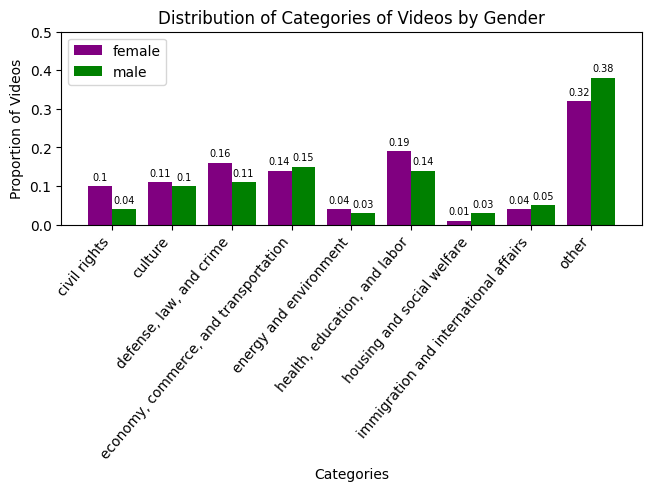

In [85]:
# side by side boxplot
def visualize_categories():
    output_female = calculate_top_categories(female_categories).sort_values("Description")
    output_male = calculate_top_categories(male_categories).sort_values("Description")
    
    categories = sorted(category_names)
    data = {'female': round(output_female["percent"],2),
            'male': round(output_male["percent"],2)}

    x = np.arange(len(categories))  # the label locations
    width = 0.4  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')
    for gender, percentages in data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, percentages, width, label=gender, color=["purple" if gender == "female" else "green"])
        ax.bar_label(rects, padding=3, size=7)
        multiplier += 1

    ax.set_xticks(x + width/2, categories)
    ax.set_ylim(0, 0.5)

    plt.xticks(rotation=50, ha='right')
    plt.xlabel("Categories")
    plt.ylabel("Proportion of Videos")
    plt.title(f"Distribution of Categories of Videos by Gender")
    plt.legend(loc='upper left')
    plt.show()

visualize_categories()

### Manual checking: Creating Samples

In [ ]:
import random

In [86]:
def drop_unmatched_ids(description_df, categories_df):
    categories_df.rename(columns={'Description': 'category_gpt'}, inplace=True)

    # filter out categories df that doesn't exist in description df
    mask = ~categories_df['video_id'].isin(description_df['video_id'])
    non_matching_categories = categories_df[mask]

    categories_filtered = categories_df[~categories_df['video_id'].isin(non_matching_categories['video_id'].tolist())]
    merged = pd.merge(categories_filtered, description_df, on='video_id', how='outer')
    without_NAs = merged[~merged['category_gpt'].isna()] #data without NA categories

    return without_NAs.drop(["description_list"], axis=1)

In [87]:
female_description = pd.read_csv("F_all_vid_descriptions_2024_04_29.csv")
male_description = pd.read_csv("M_all_vid_descriptions_2024_04_29.csv")
drop_unmatched_ids(female_description, female_categories)
drop_unmatched_ids(male_description, male_categories)

,video_id,category_gpt,description_string
0,6769961060226075909,other,"hello tiktok, i’m rep. mark takano 👋🏼"
1,6769978510497844485,culture,baking a cake with the sweet feminist ☂️
2,6829721401499421957,"health, education, and labor",$13 billion inrelief funding in theshould be g...
3,6907019172203613446,other,44 + 46 = ❤️
4,6924425222460411141,other,i am running to bein the house of representati...
...,...,...,...
969,7359310165461568798,other,do you know what drives me nuts about what’s g...
970,7359600432097824043,housing and social welfare,we cannot allow the supreme court or local gov...
971,7359609189032824095,"economy, commerce, and transportation",the affordable connectivity program serves ove...
972,7359628313263901995,"defense, law, and crime",here’s a question you don’t hear the corporate...


In [74]:
def sample_videos(merged_df):
    k = int(0.20*merged_df.shape[0]) # sample 20% of the videos
    print("k: ", k)
    indices = random.sample(merged_df.index.to_list(), k) #choose without replacement
    return merged_df[merged_df.index.isin(indices)]

In [72]:
female_description = pd.read_csv("F_all_vid_descriptions_2024_04_29.csv")
female = drop_unmatched_ids(female_description, female_categories)
sample_videos(female).to_csv("female_manual_verification.csv", index=False)

k:  87


In [73]:
male_description = pd.read_csv("M_all_vid_descriptions_2024_04_29.csv")
male = drop_unmatched_ids(male_description, male_categories)
sample_videos(male).to_csv("male_manual_verification.csv", index=False)

k:  189


### Manual checking: Comparison between GPT and manual categories

In [ ]:
# TO DO

### Code Graveyard

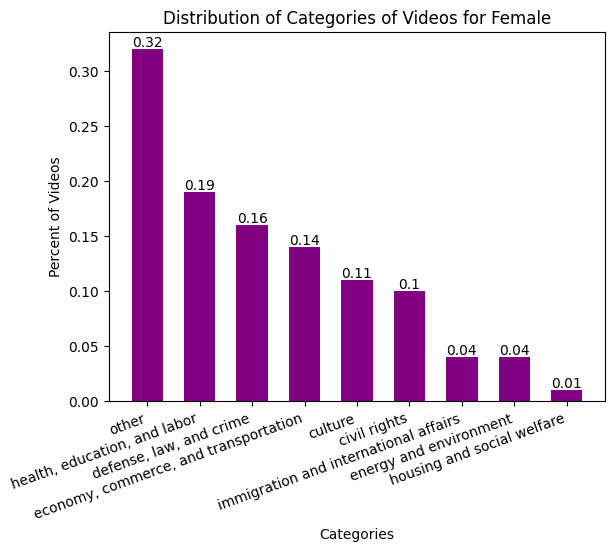

In [6]:
def visualize_categories(df, gender):
    output = calculate_top_categories(df)
    
    bars = plt.bar(output["Description"], round(output["percent"],2), color = "purple", width = 0.6)
    plt.bar_label(bars)
    plt.xticks(rotation=20, ha='right')
    plt.xlabel("Categories")
    plt.ylabel("Percent of Videos")
    plt.title(f"Distribution of Categories of Videos for {gender}")
    plt.show()
    
visualize_categories(female_categories, "Female")